## separate test data

In [1]:
from sklearn.model_selection import train_test_split

import numpy as np
data = np.loadtxt('quadratic_raw_data.csv', delimiter=',' ,skiprows=1)
x= data[:,0]
x = x.reshape(-1, 1)
y= data[:,1]

In [2]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Text(0, 0.5, 'y')

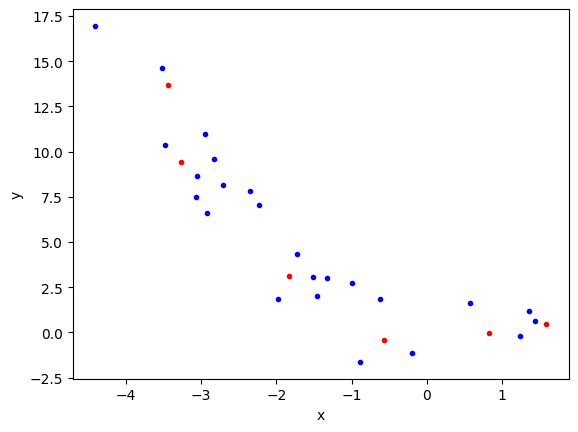

In [3]:
import matplotlib.pyplot as plt
plt.plot(x_train,y_train,'b.')
plt.plot(x_test,y_test,'r.')
plt.xlabel('x')
plt.ylabel('y')

## check dataset sizes

In [4]:
print('Number of samples in training set: ', x_train.shape[0])
print('Number of samples in test set: ', x_test.shape[0])

Number of samples in training set:  24
Number of samples in test set:  6


## fit pipeline and predict

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipe = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
('scaler', StandardScaler()),
('model', LinearRegression())])



pipe.fit(x_train, y_train)
y_predicted_train = pipe.predict(x_train)
y_predicted_test = pipe.predict(x_test)

## performance metrics

In [6]:
from sklearn.metrics import mean_squared_error as mse

In [7]:
print('Training metric (mse) = ', mse(y_train, y_predicted_train))
print('Test metric (mse) = ', mse(y_test, y_predicted_test))

Training metric (mse) =  2.339033378668229
Test metric (mse) =  1.4295282860514937


Text(0.5, 0, 'y')

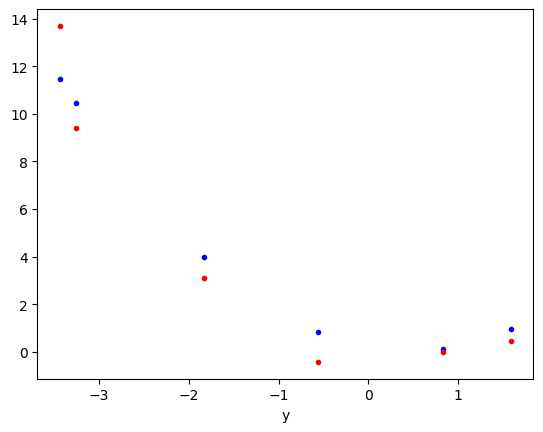

In [8]:
plt.plot(x_test,y_predicted_test,'b.')
plt.plot(x_test,y_test,'r.')
plt.xlabel('x')
plt.xlabel('y')

## separate fitting and validation data

In [9]:
from sklearn.model_selection import train_test_split
x_fit, x_val, y_fit, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

## assess performance on validation sets for different hyperparameter values

In [10]:
from sklearn.metrics import mean_squared_error as mse
fit_MSEs = []
validation_MSEs = []
for poly_degree in range(1,6):
    # set hyper-parameter value
    pipe['poly'].degree = poly_degree
    # fit & predict
    pipe.fit(x_fit, y_fit)
    y_pred_fit = pipe.predict(x_fit)
    y_pred_val = pipe.predict(x_val)
    # compute scores and append
    fit_MSE = mse(y_fit, y_pred_fit)
    validation_MSE = mse(y_val, y_pred_val)
    fit_MSEs.append(fit_MSE), validation_MSEs.append(validation_MSE)

## plot validation curve

(<matplotlib.legend.Legend at 0x1c7f5759910>,
 Text(0.5, 0, 'Polynomial degree'),
 Text(0, 0.5, 'MSE'))

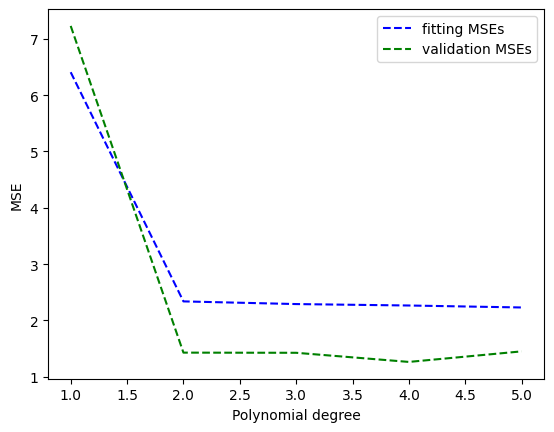

In [11]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(np.arange(1,6), fit_MSEs, 'b--', label='fitting MSEs')
plt.plot(np.arange(1,6), validation_MSEs, 'g--', label='validation MSEs')
plt.legend(), plt.xlabel('Polynomial degree'), plt.ylabel('MSE')